# Kernel SVM

The Support Vector Machine (SVM) algorithm (seen previously) helps identify the decision boundary between classes in data that is linearly separable. However, when data is not linearly separable, as in cases where no straight line can divide the data points, the SVM cannot find a solution.

To handle this, we use the **Kernel Support Vector Machine**, which transforms the data into a higher-dimensional space to make it linearly separable.
- This can be done through the **"kernel trick",** which allows for efficient computation without explicitly working in higher dimensions.
- Various types of kernels will be explored in future lessons.

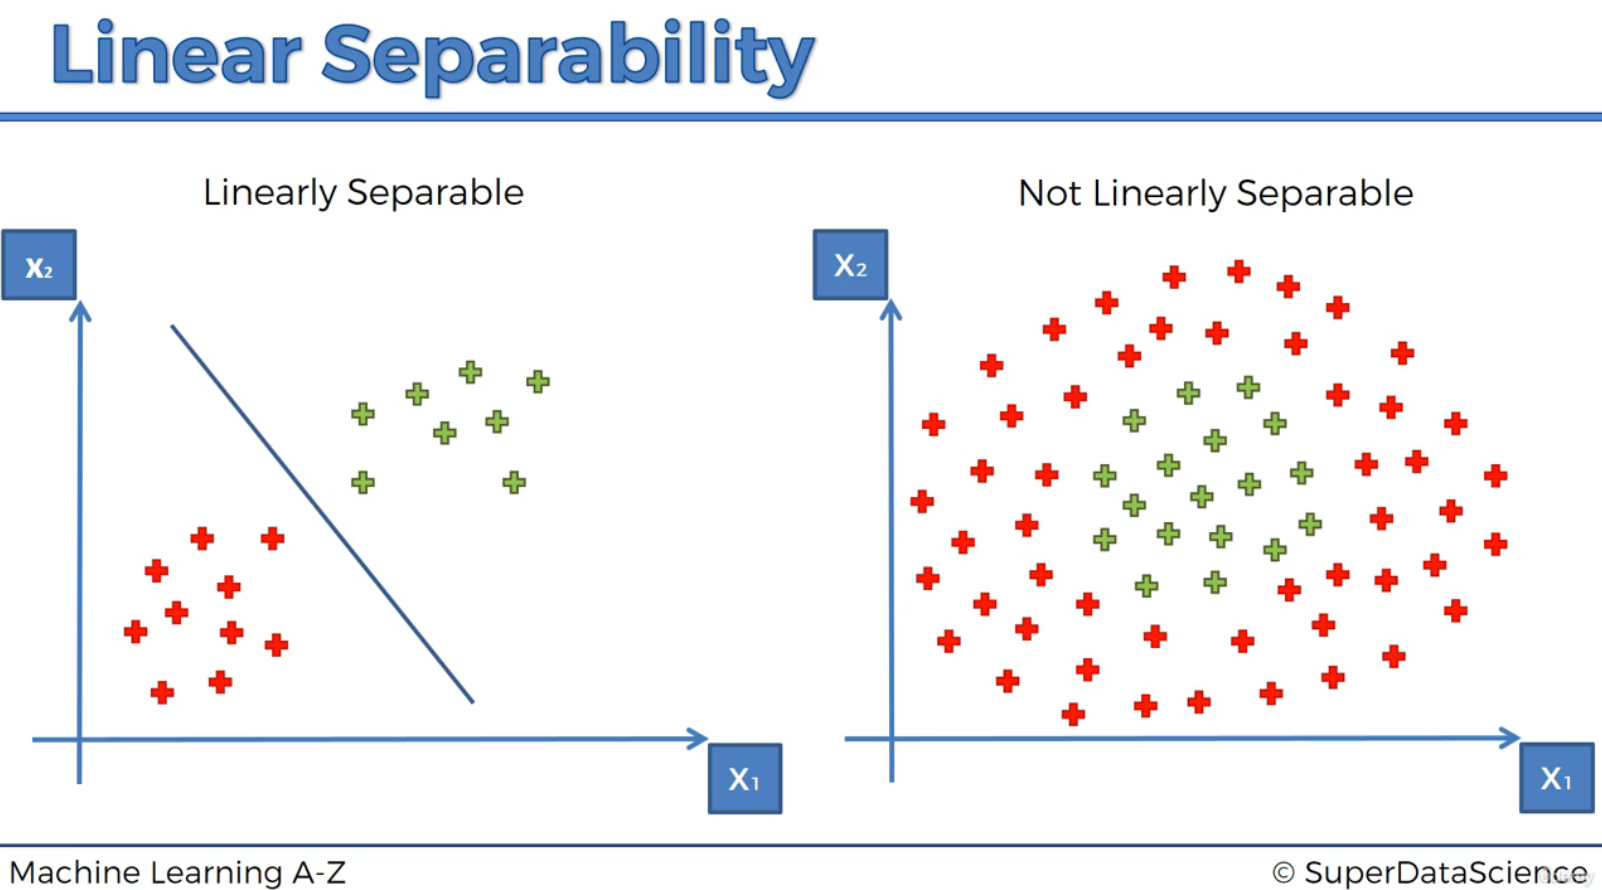

### Transforming data to a Higher-Dimensional Space

Handling non-linearly separable data can be done by mapping it to a higher-dimensional space. By doing this, the data becomes linearly separable, allowing the Support Vector Machine (SVM) algorithm to find a decision boundary.

**Example**: This process can be illustrated with a one-dimensional example, where a mapping function transforms the data, enabling a linear separator to be applied.

In the graph below we see how we have the data in a single line/dimension:

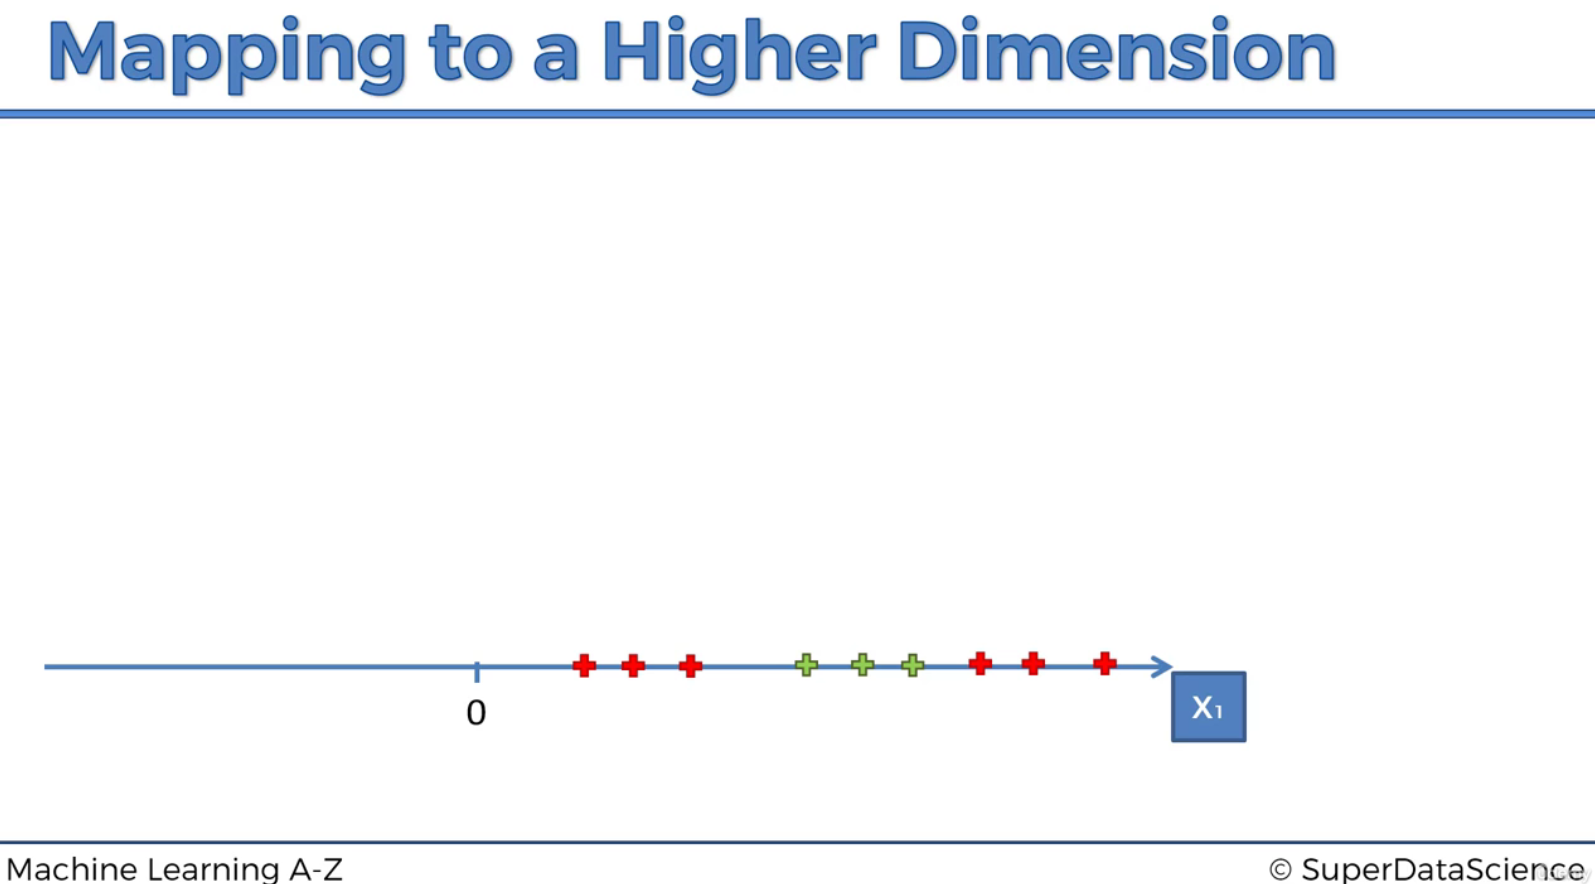

By shifting and squaring the data, it can be separated using a straight line in two dimensions:

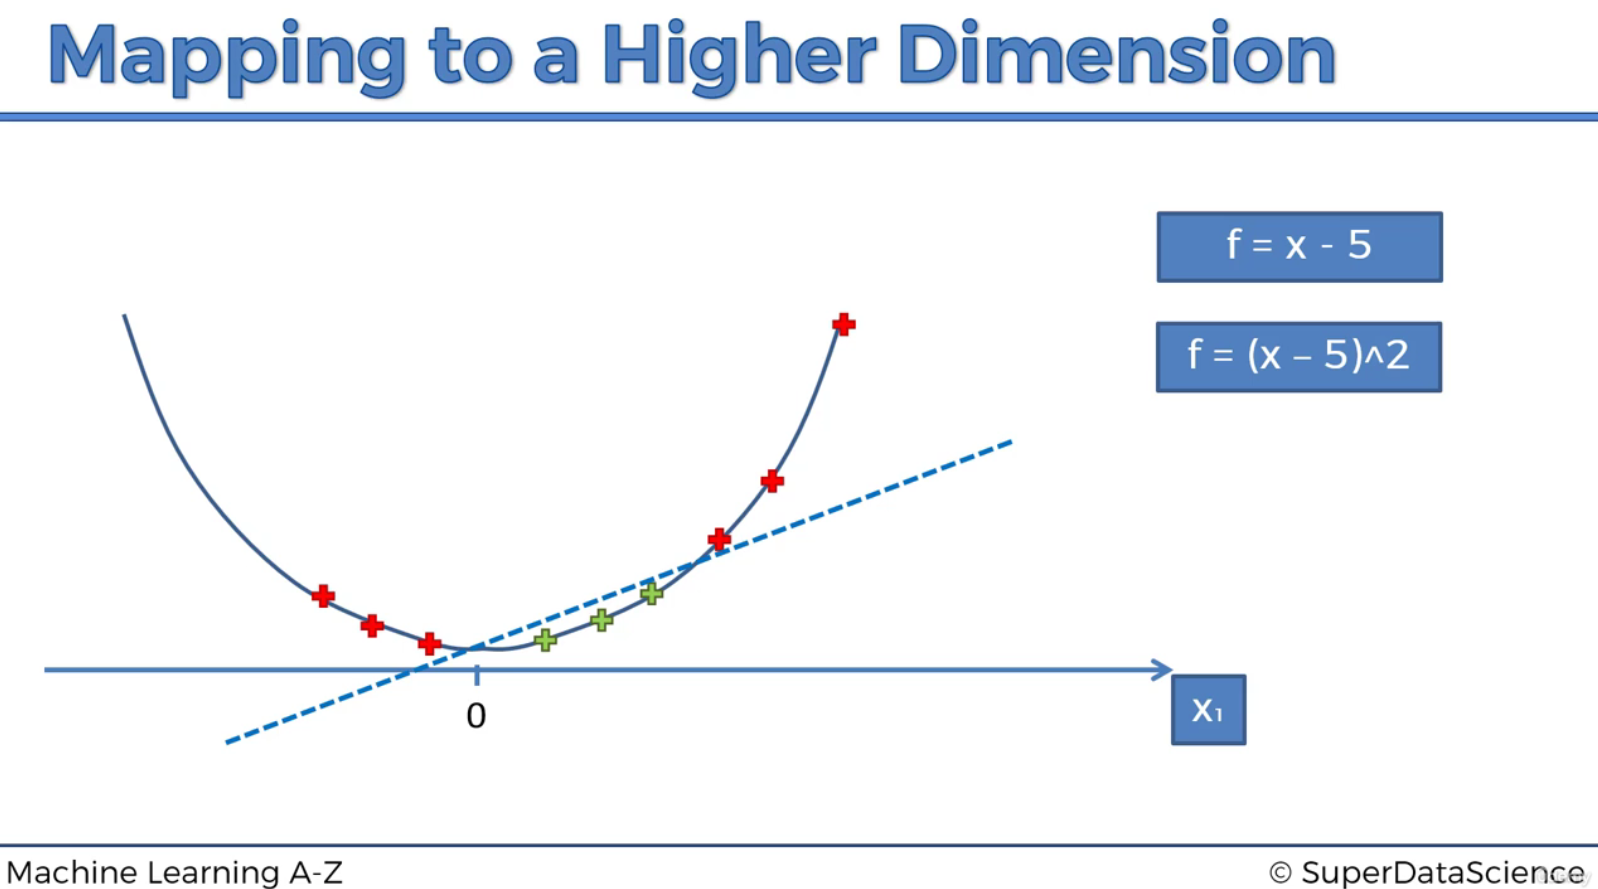

The same concept extends to higher dimensions, like mapping 2D data into a 3D space where a hyperplane can separate the classes.




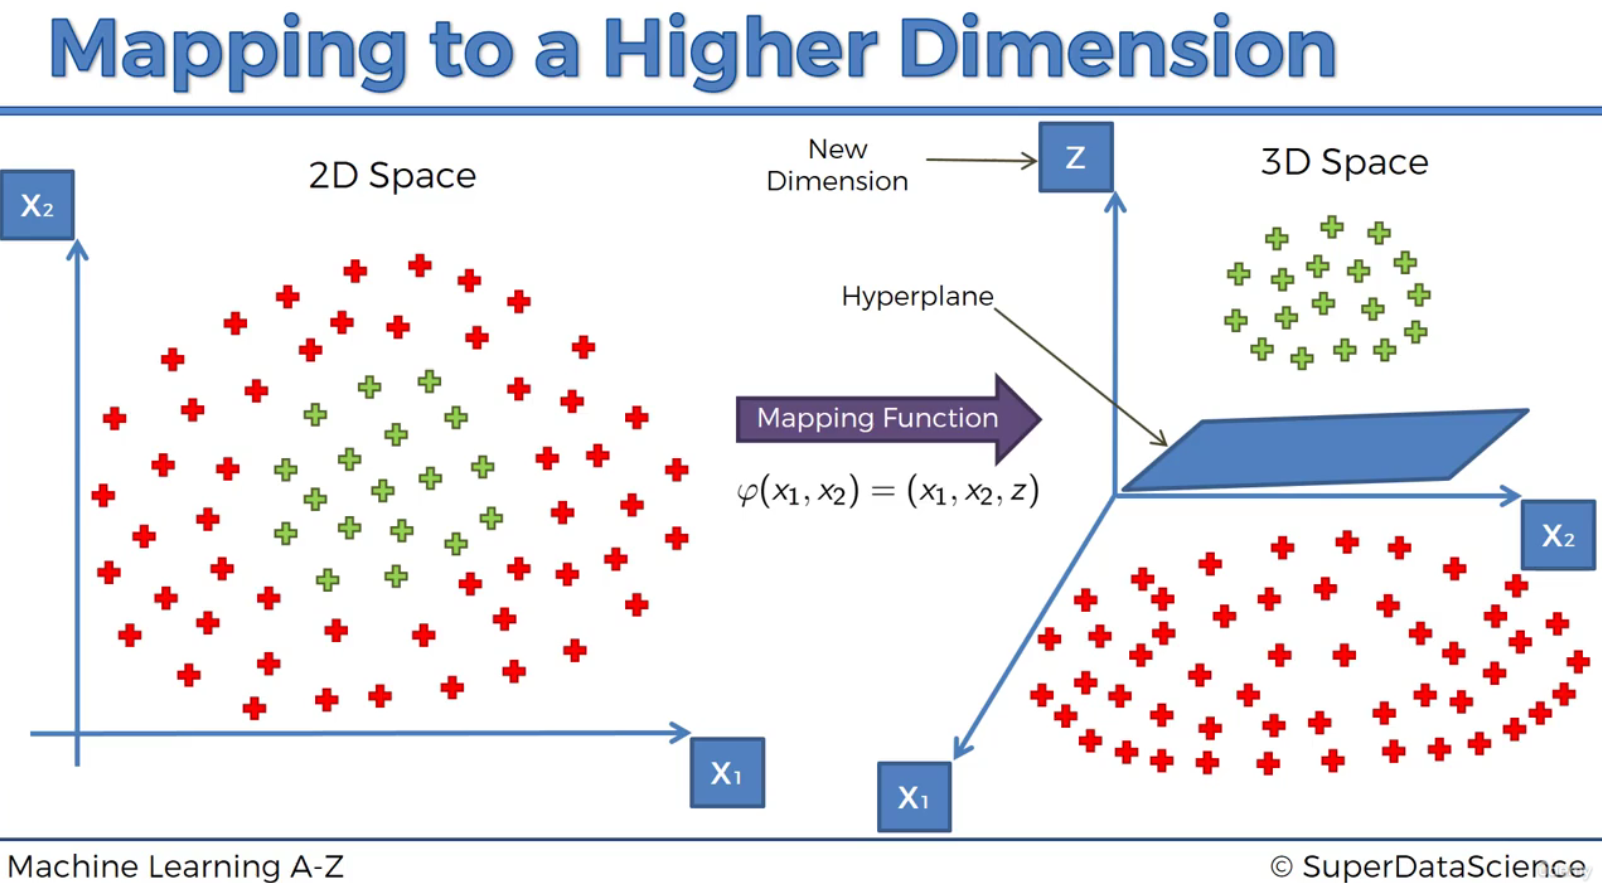

After finding the decision boundary, the data can be projected back to the original space to classify the points.


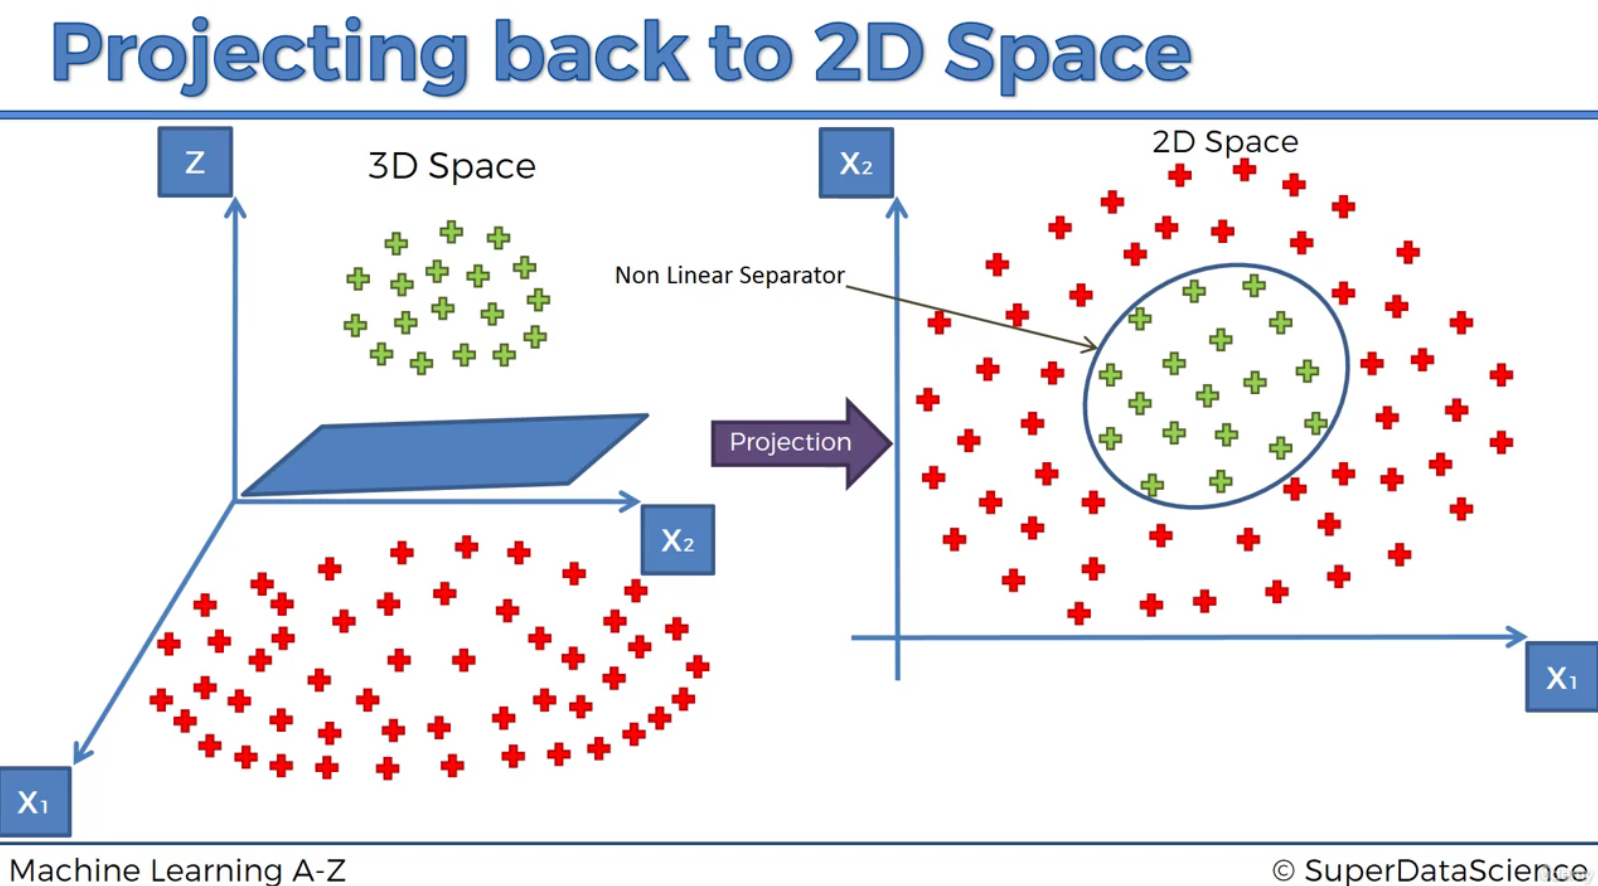


### The Kernel Trick: How to minimize Computational Cost

However, **mapping to higher dimensions is computationally expensive**, especially with large datasets. To address this, the **Kernel Trick** offers an alternative approach, allowing similar results without explicitly increasing the dimensionality.

**The Gaussian (radial basis function) kernel:**

It as a mathematical function that calculates distances between data points (X) and landmarks (L). The result of this function is used to classify points, assigning values based on proximity to the landmark.


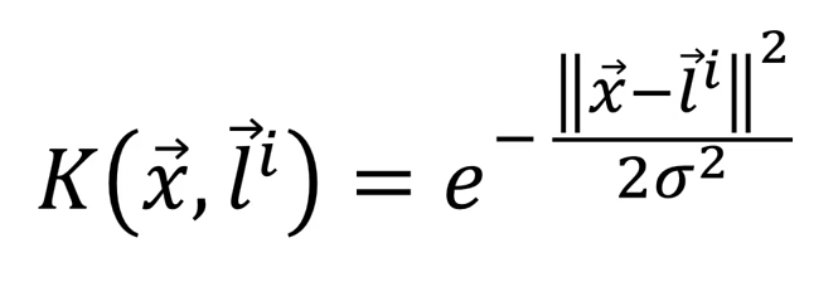

- **K (Kernel function)**: The kernel is a function that computes a similarity measure between two vectors (points). It maps the relationship between the input vector \(X\) and a landmark \(L\). The goal of the kernel function is to create a transformed space where non-linear patterns can be separated linearly.

- **X (Input vector)**: This represents a point in the dataset. The goal is to calculate the distance of this point from the landmark to help define its classification or contribution to the model.

- **L (Landmark)**: A reference point in the dataset used to measure the distance between itself and other points (like \(X\)). The goal of the landmark is to serve as a comparison point for determining how close or far another point is from it.

- **Distance (||X - L||²)**: The double vertical lines denote the Euclidean distance between the input vector \(X\) and the landmark \(L\), squared. The goal is to capture how far \(X\) is from \(L\), where larger distances will contribute to a lower value of the kernel function.

- **\($\sigma$\) (Sigma)**: This is a parameter that controls the width of the kernel. The term \($2\sigma^2$\) appears in the denominator. A larger sigma leads to a wider kernel, meaning more points will be considered close to the landmark, while a smaller sigma means fewer points will be considered close. The goal of sigma is to adjust the sensitivity of the kernel to the distance between points.

- **Exponent (e)**: The function is wrapped in an exponential expression. After calculating the squared distance divided by \($2\sigma^2$\), the exponentiation transforms the result. The goal of the exponent is to reduce the influence of points farther away from the landmark, with the value approaching 0 as the distance increases.

In a two-dimensional space, this function forms a decision boundary by assigning points within a certain radius (determined by the parameter sigma) values above zero, while points outside the radius get values close to zero. By adjusting sigma, the boundary can be tuned to separate different classes.


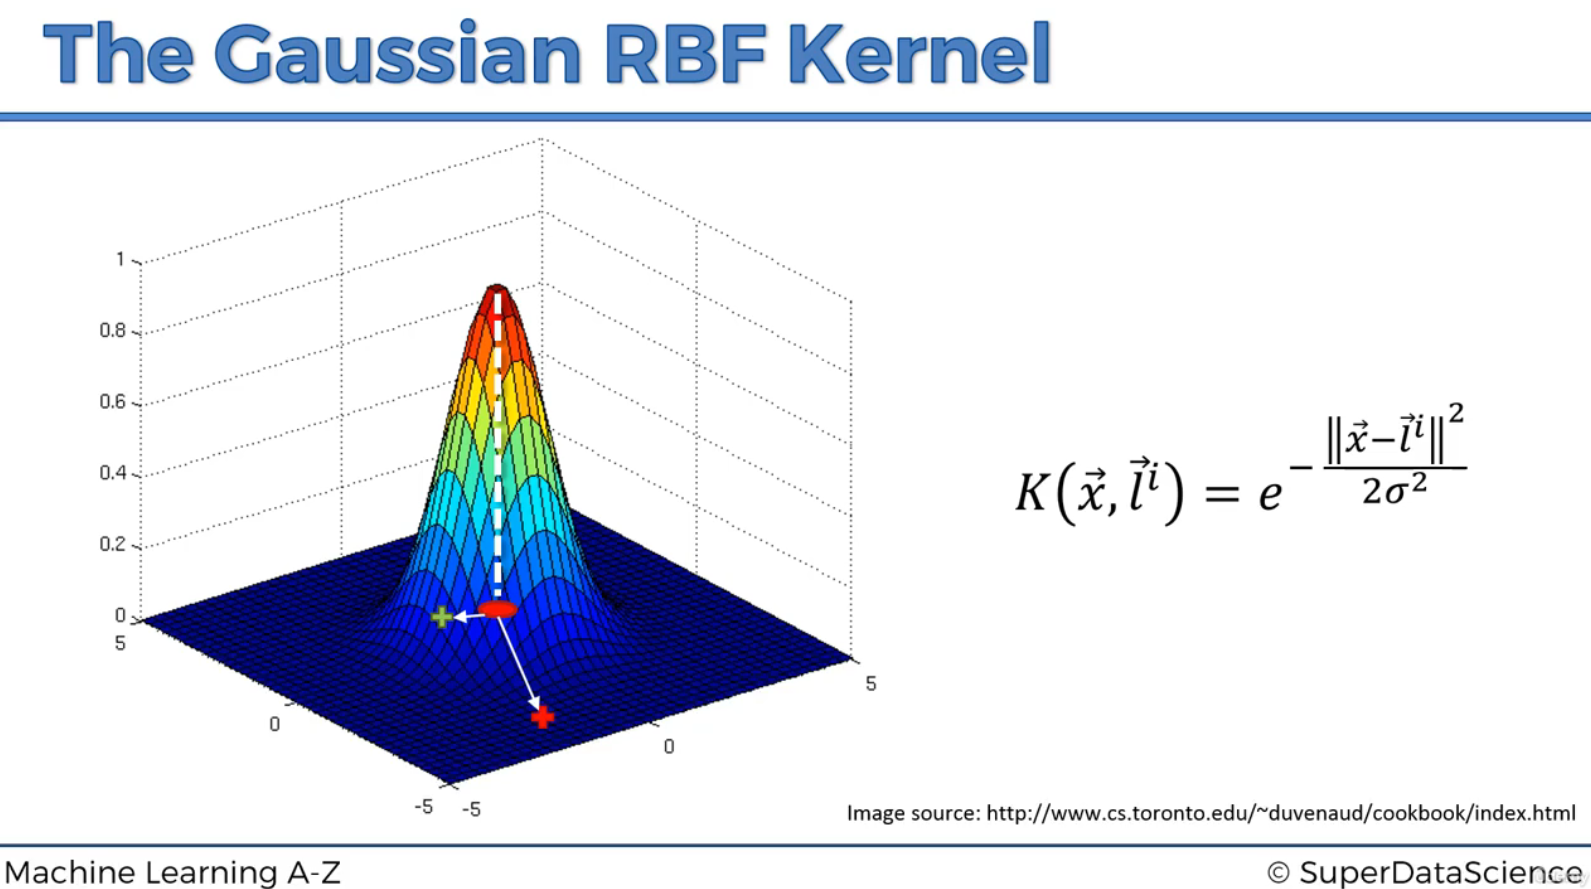

The image above represents the Gaussian Radial Basis Function (RBF) kernel for a specific sigma and landmark. The landmark is positioned at the center of a 2D plane (at the coordinates \(0, 0\)), and the vertical axis represents the output of the kernel function for any point on this plane.

For any point \(X\) on the plane, the distance to the landmark is calculated, squared, and divided by \($2\sigma^2$\). This result is then negated and exponentiated. The kernel value approaches 1 when \($X$\) is near the landmark, and approaches 0 when \($X$\) is far from the landmark.

This visual shows that when a point is far from the landmark, the function's value is close to 0 (flat on the vertical axis). As the point moves closer to the landmark, the kernel's value increases, peaking at 1 when the point exactly coincides with the landmark.

This demonstrates how the Gaussian RBF kernel function assigns higher values to points near the landmark and lower values to points further away, forming a smooth, hill-like structure.

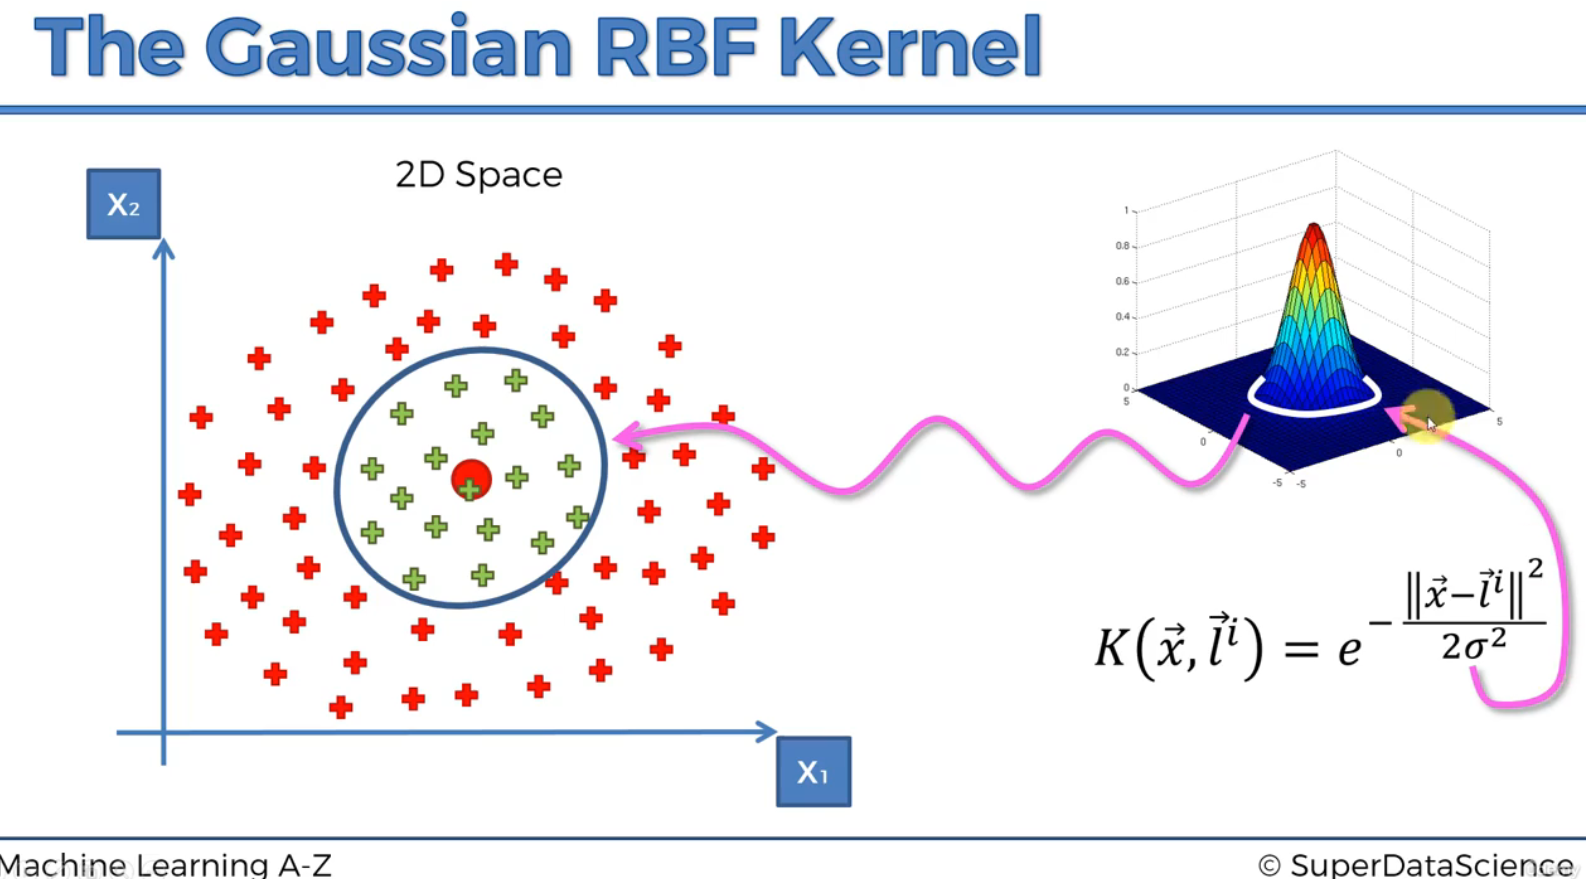

We can also combine two Kernel functions to obtain more complex patterns:

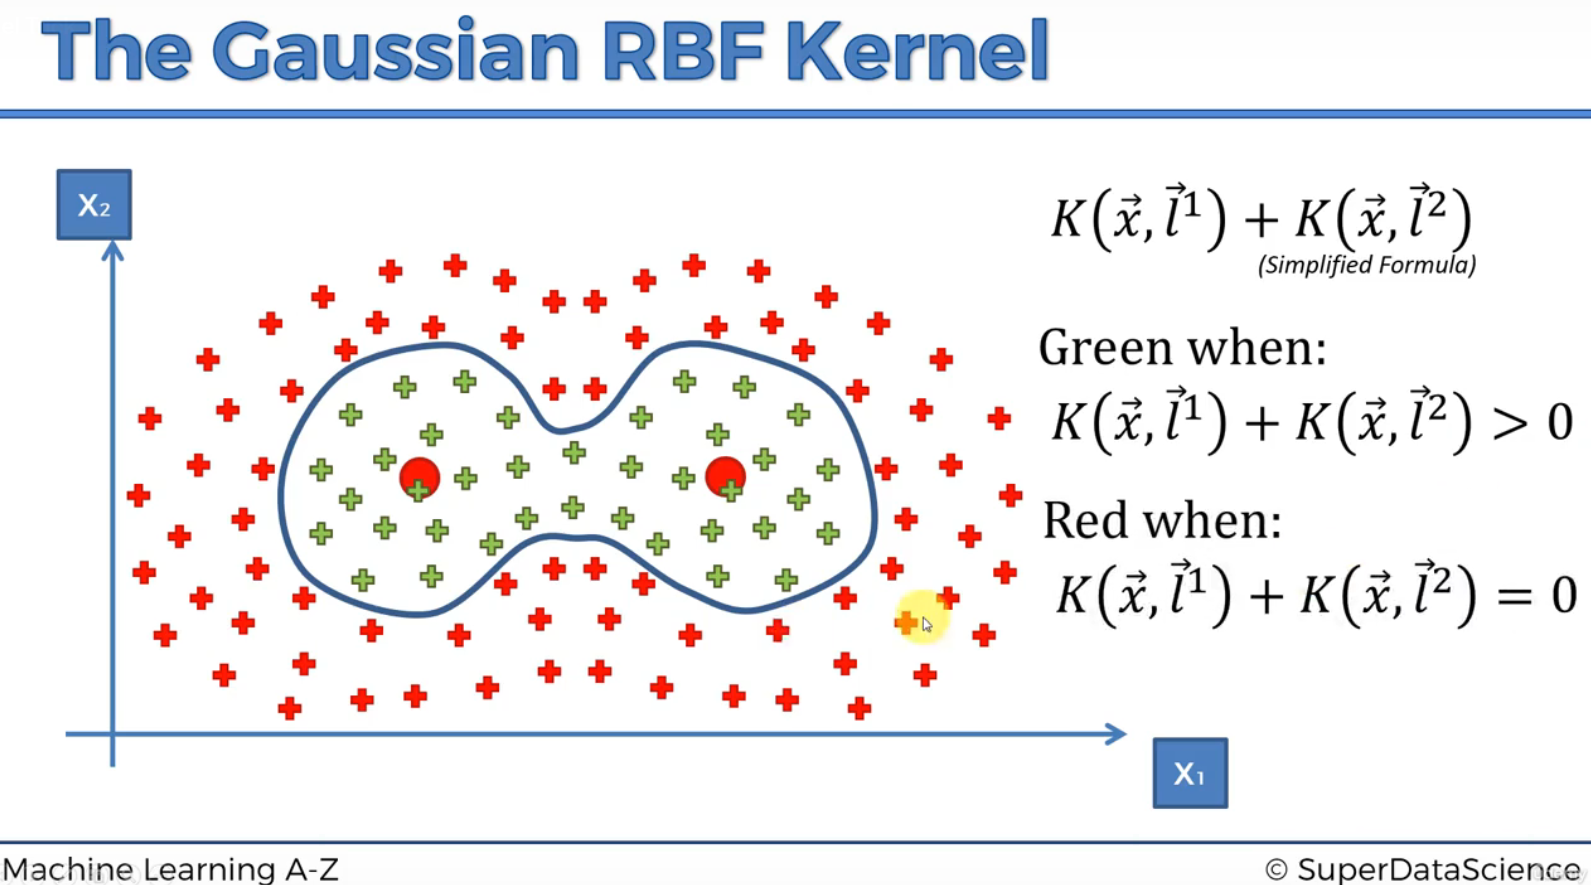


The key benefit of the kernel trick is that it avoids the computational intensity of working in higher dimensions. Instead, the trick uses kernel functions in the original dimensional space to achieve the same effect. This method can handle complex problems while remaining efficient. In essence, the kernel trick allows for flexible, non-linear classification while performing computations in the original space.

### Types of Kernel Functions

- **Gaussian RBF Kernel:** Use for general non-linear relationships with unknown forms.
- **Sigmoid Kernel:** Use when you want a kernel with behavior akin to neural networks or for specific shaped boundaries.
- **Polynomial Kernel:** Use when the decision boundary is expected to be polynomial and you can specify the polynomial degree.

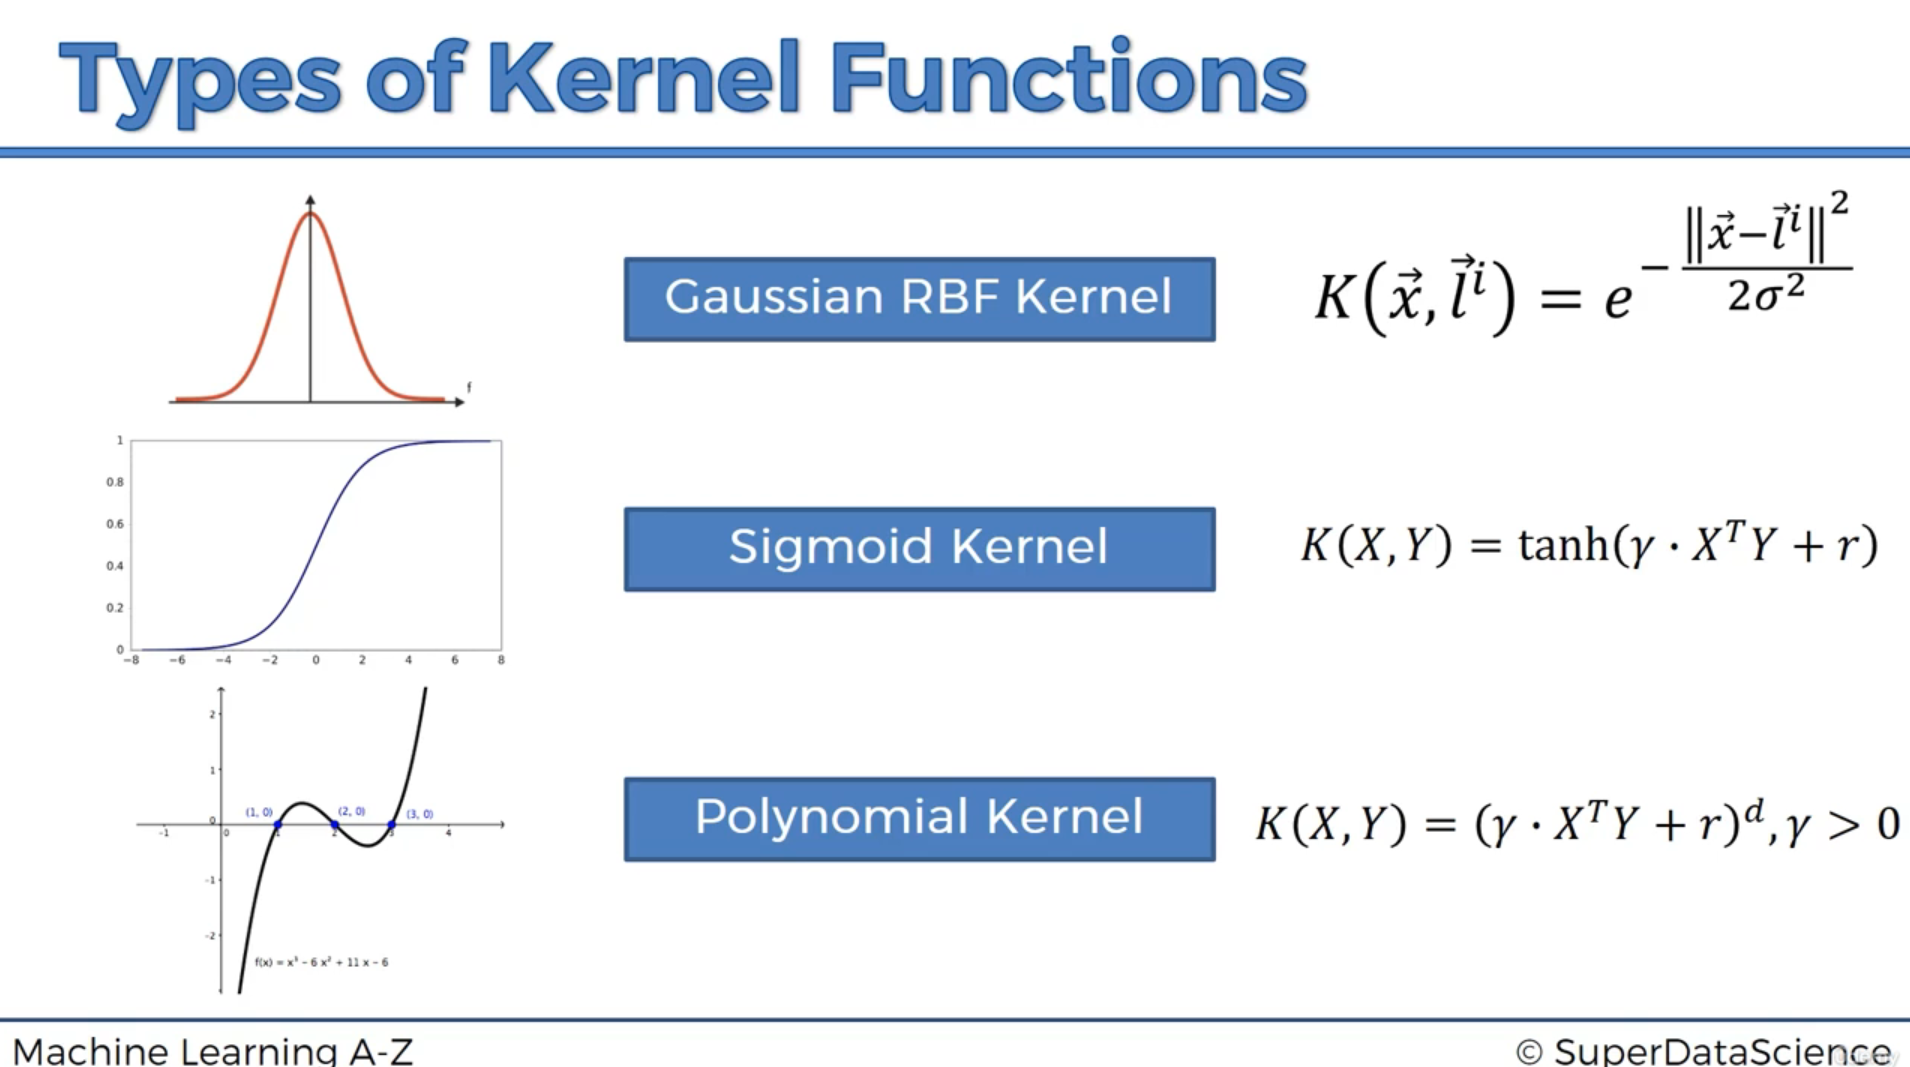

### Non-Linear SVR

Non-linear support vector regression (SVR) is an advanced topic used when a linear model doesn't fit the data well. Non-linear SVR allows for modeling complex, non-linear relationships.

Example:
- **2D and 3D Transition:** The tutorial introduces a 2D dataset and transitions to a 3D perspective to better fit non-linear relationships. A box and diagonal lines are added for visualization, and the data is projected into a third dimension.
- **Kernel Function:** The radial basis function (RBF) kernel is introduced to transform the data into a higher dimension, allowing for a better fit.
- **Hyperplane:** In 3D, a linear model is represented as a hyperplane, which intersects with the RBF surface. This intersection is then projected back onto the 2D plane to show the non-linear fit.



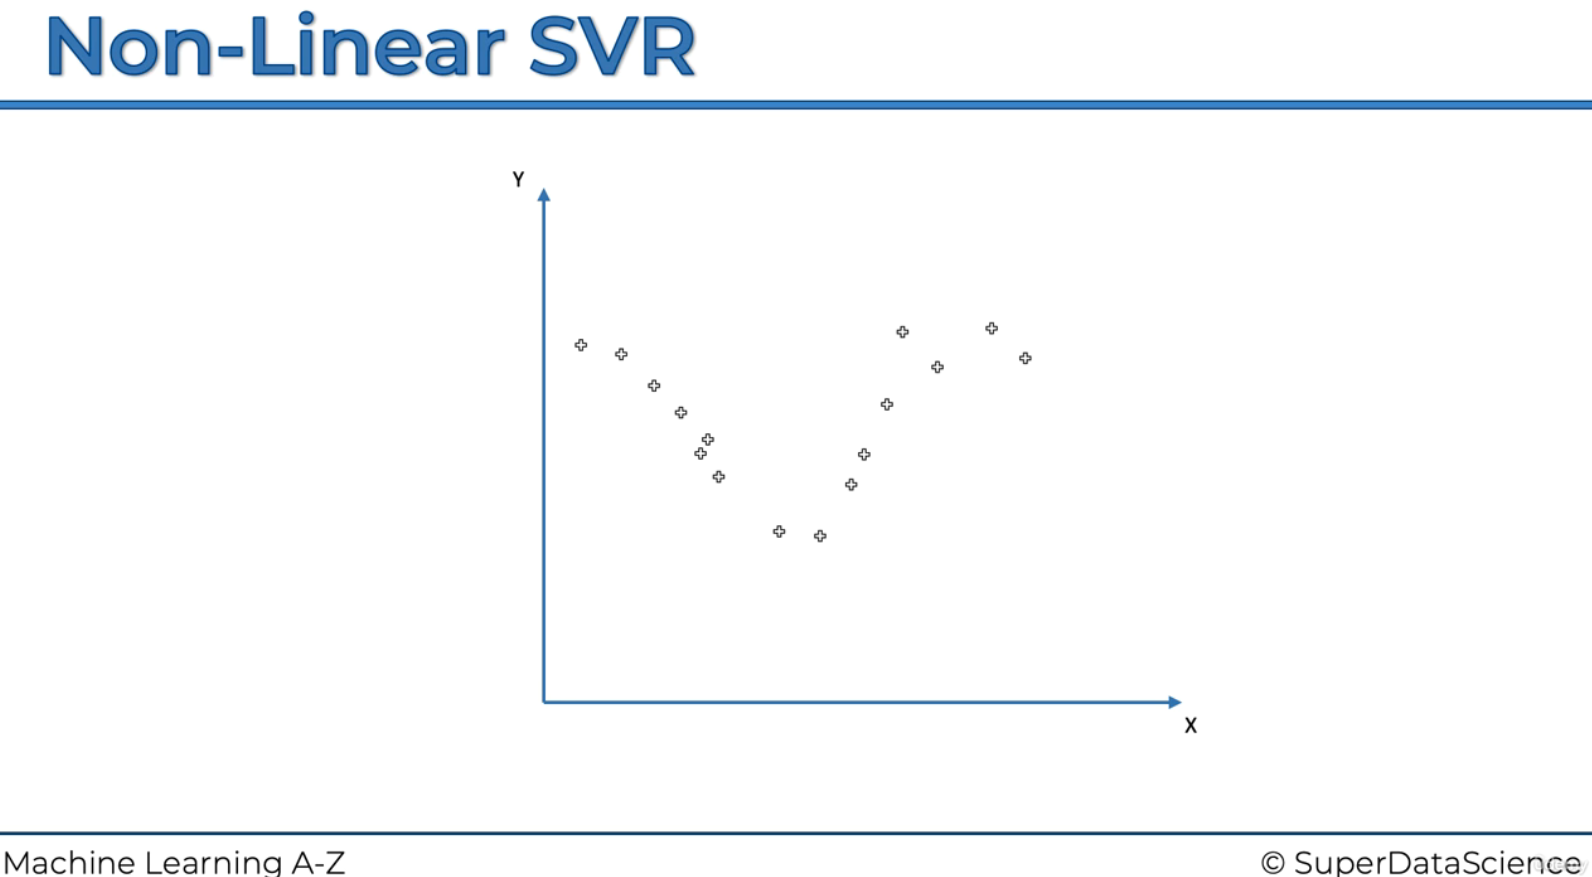

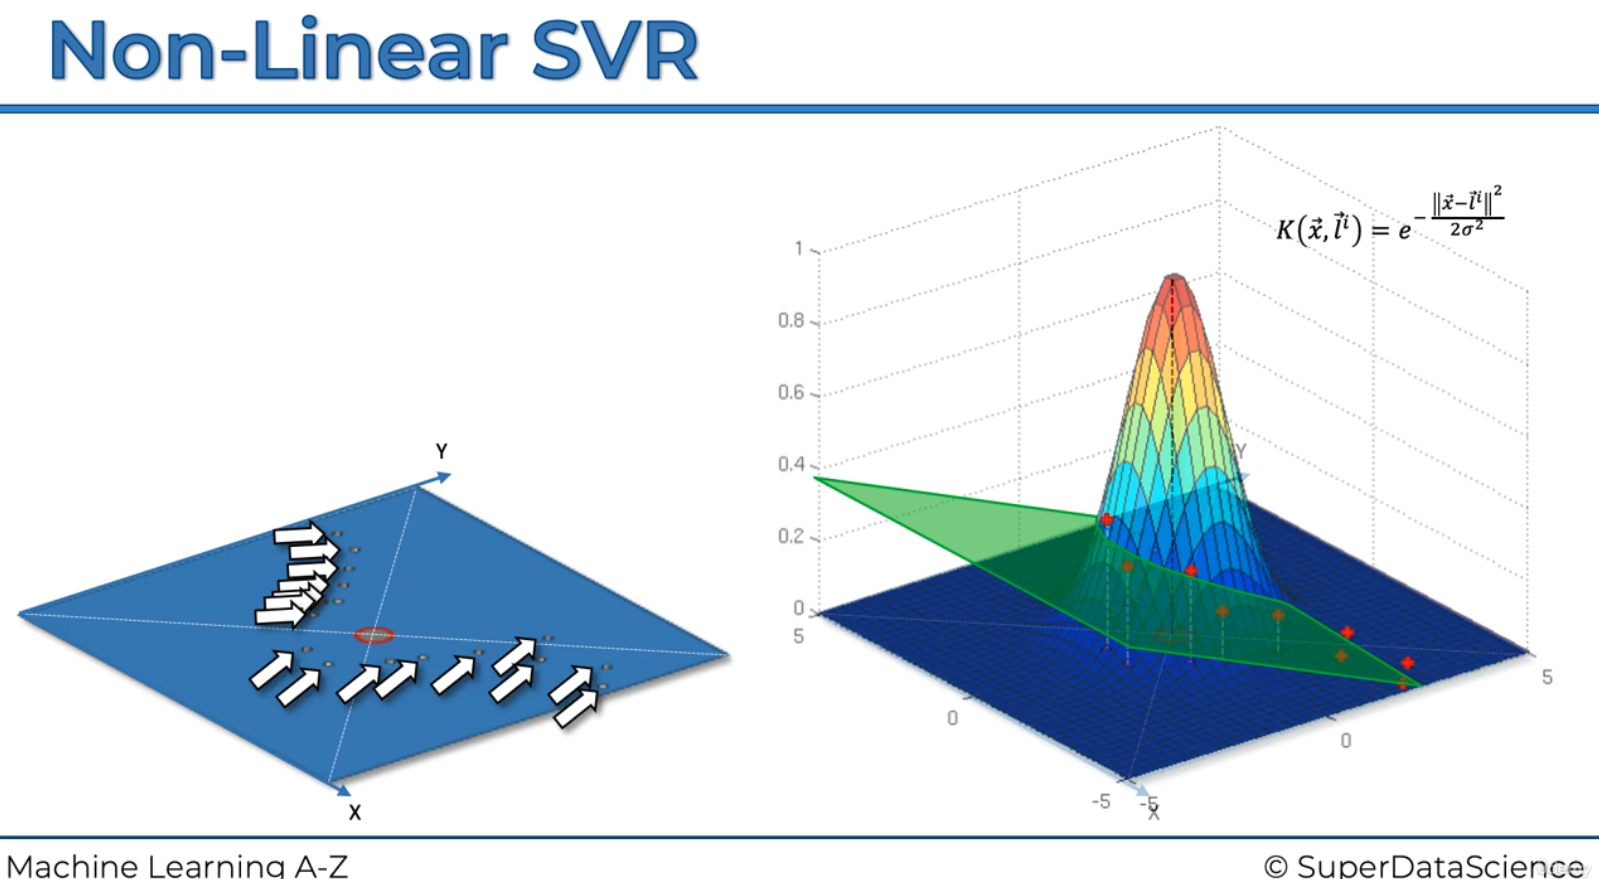


- **Support Vectors:** In 3D, SVR involves finding hyperplanes with an epsilon-sensitive space between them. Points within this space are not considered errors, and the goal is to minimize errors outside this space.



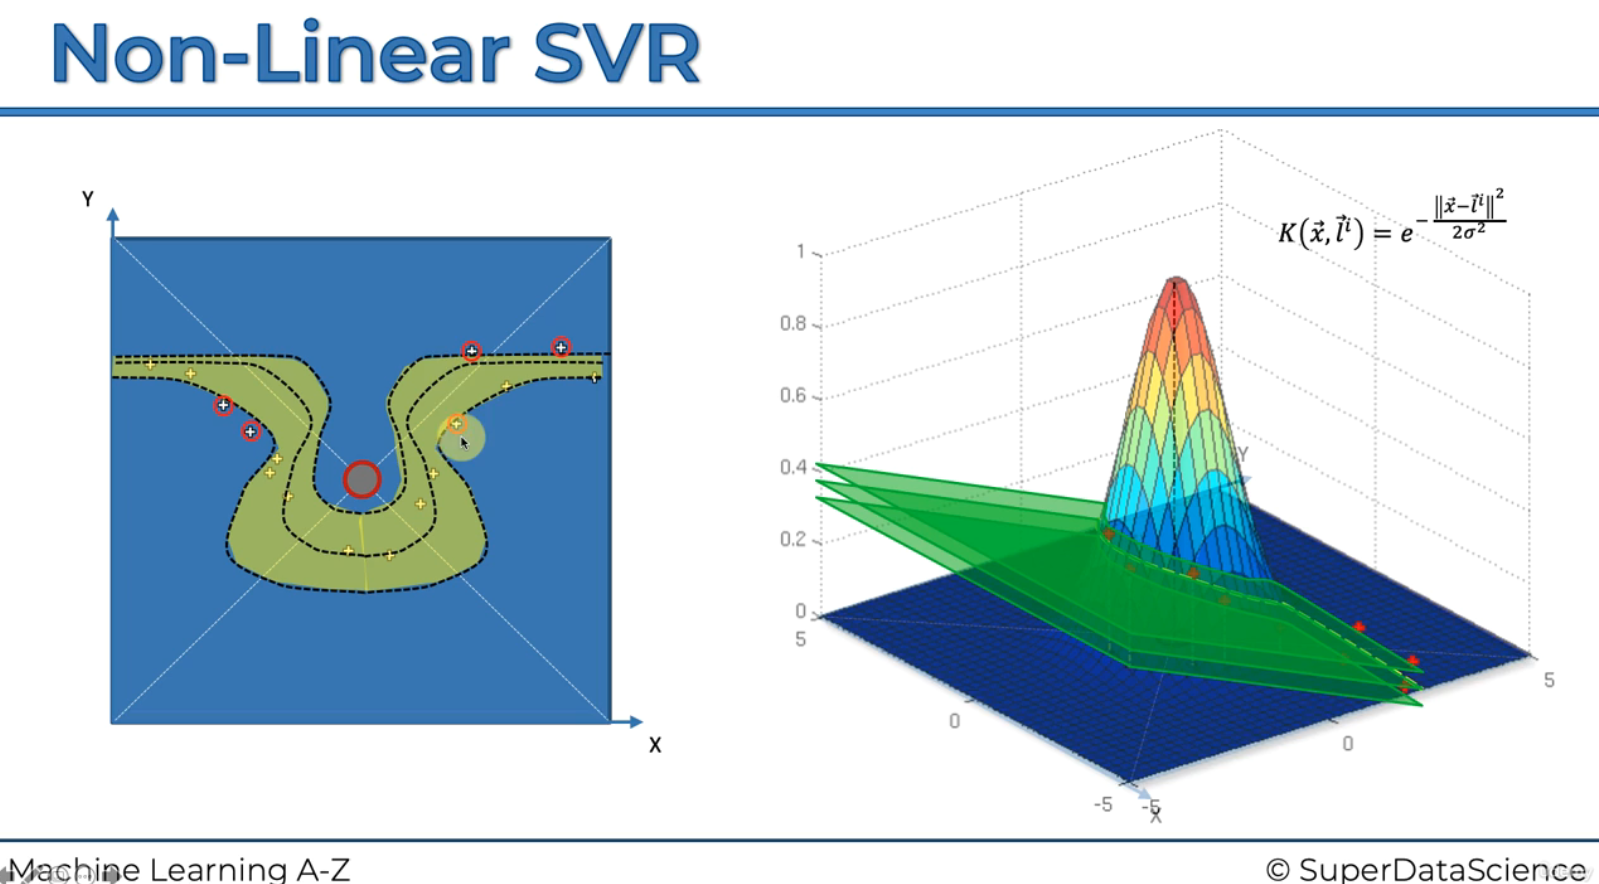

- **Kernel Trick:** In practice, the kernel trick is used to perform these transformations and calculations without explicitly working in the higher-dimensional space. This makes the process computationally efficient.


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 3 - Classification/4 Kernel SVM/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split

# Split data into 75% training and 25% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [6]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [7]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [8]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler to X_train and transform X_train to standardize it (mean=0, std=1)
X_train = sc.fit_transform(X_train)

# Transform X_test using the same scaler (fitted on X_train) to ensure consistent scaling
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [11]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## Training the Kernel SVM model on the Training set

In [12]:
from sklearn.svm import SVC

# Create the SVM classifier with an 'rbf' (Radial Basis Function) kernel and set a random state for reproducibility
classifier = SVC(kernel = 'rbf', random_state = 0)

# Fit the classifier with the training data (X_train, y_train)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting a new result

In [13]:
# Predict the class for a new sample after applying the same scaling used on the training set
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [14]:
# Predict the class labels for the test set (X_test)
y_pred = classifier.predict(X_test)

# Print the predicted and actual class labels side by side for comparison
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix to compare predicted and actual labels in the test set
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix, which shows true positives, true negatives, false positives, and false negatives
print(cm)

# Calculate and return the accuracy score, which is the proportion of correctly predicted labels
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

The confusion matrix:

- **64**: True negatives (correctly predicted class 0)
- **29**: True positives (correctly predicted class 1)
- **4**: False positives (incorrectly predicted as class 1, but actually class 0)
- **3**: False negatives (incorrectly predicted as class 0, but actually class 1)

The **accuracy score** of **0.93** means that the model correctly predicted 93% of the test set, reflecting a high level of accuracy in this classification task.

We reached the same accuracy score as K-NN model.

## Visualising the Training set results

<ipython-input-16-8c48e2f280ba>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


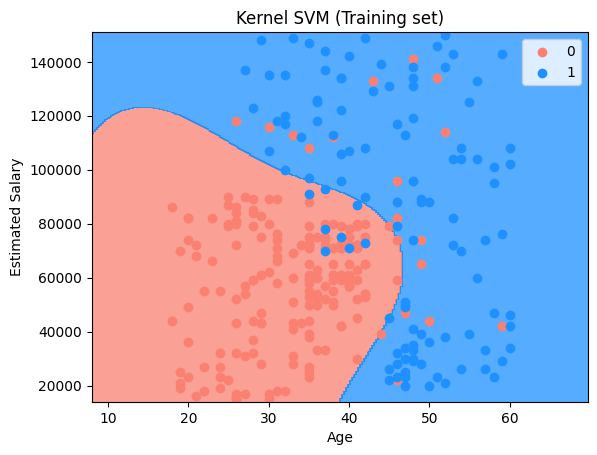

In [16]:
from matplotlib.colors import ListedColormap

# Reverse the scaling on the training data to get the original feature values (Age, Estimated Salary)
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create a mesh grid for plotting the decision boundary, defining the range for Age and Estimated Salary
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# Plot the decision boundary by classifying each point on the grid using the trained classifier
# Use `contourf` to fill the background regions with colors corresponding to each class (0 or 1)
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

# Set the x and y axis limits to the min and max values of the mesh grid
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training data points with different colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-17-9844c12e7d68>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


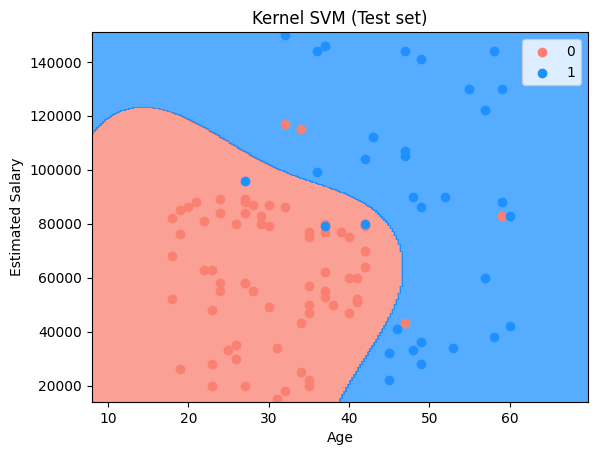

In [17]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()